# Grid Search

In [1]:
from Montecarlo import GridSearch
cv = GridSearch("IDBTVER")
cv.search()
top_300 = cv.get_top(300)

0.06679


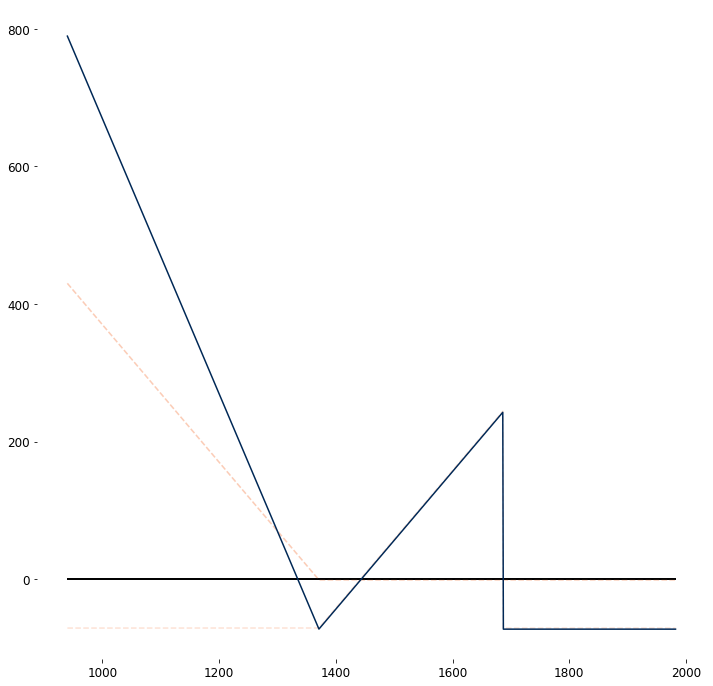

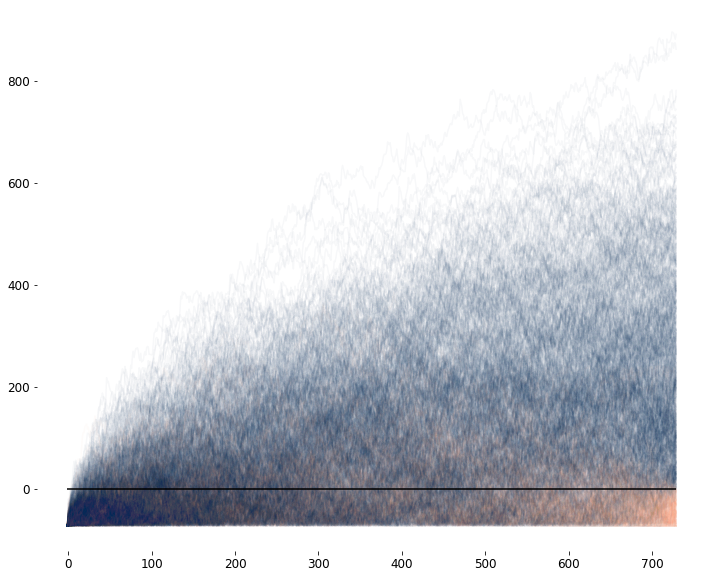

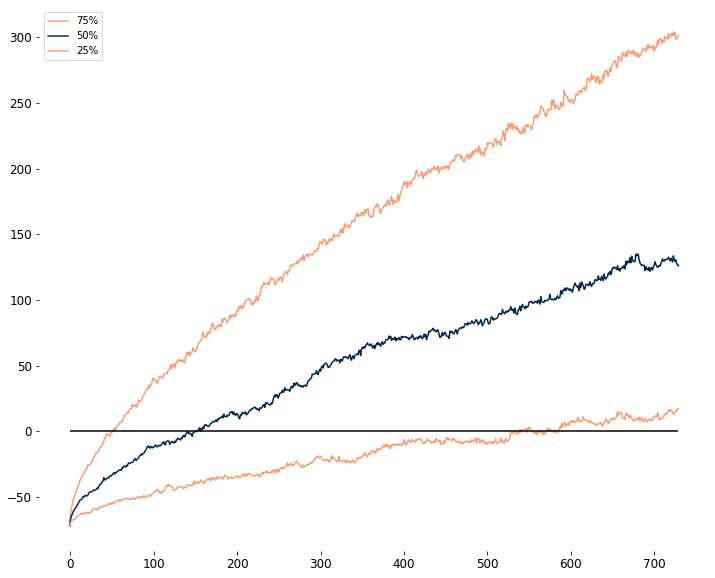

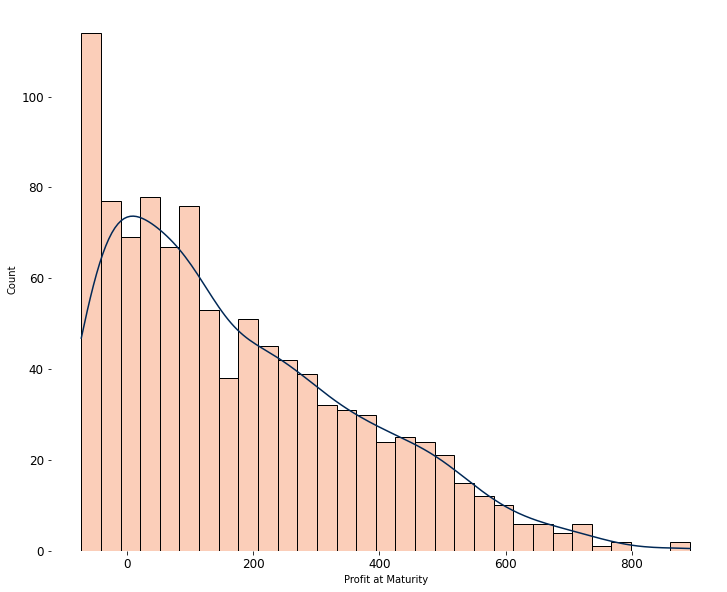

In [7]:
top_300[25].display()

# Strip con Knockout

0.06679


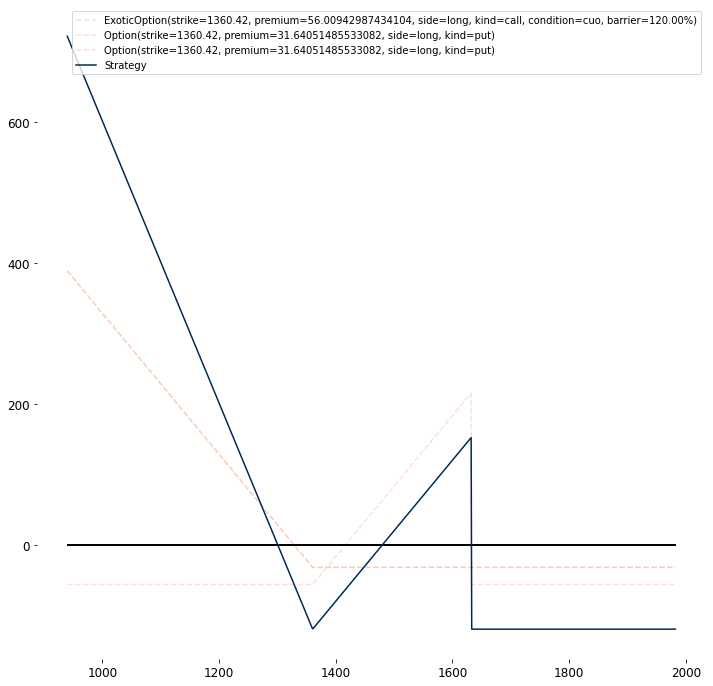

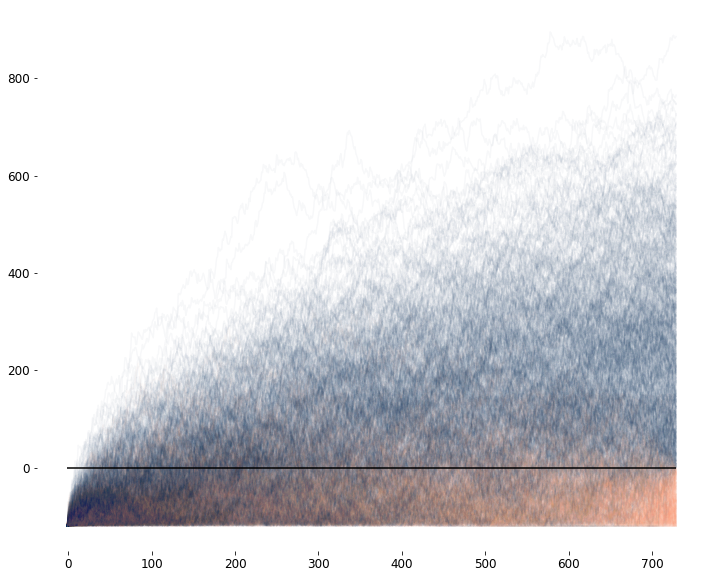

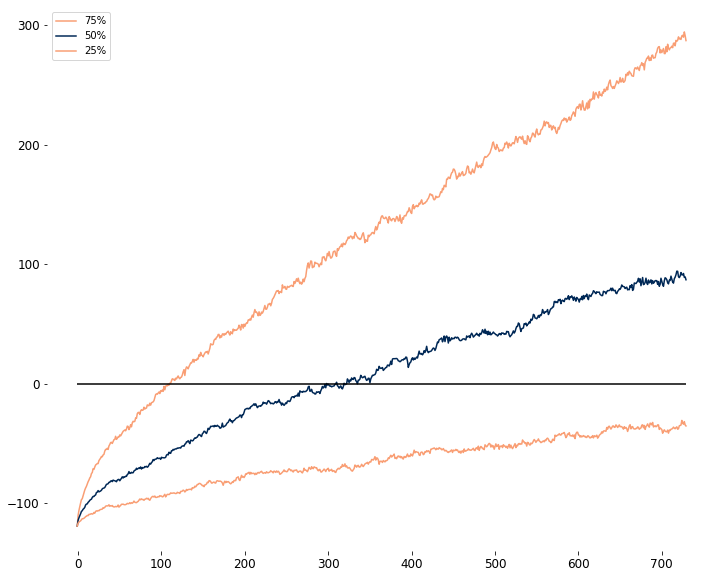

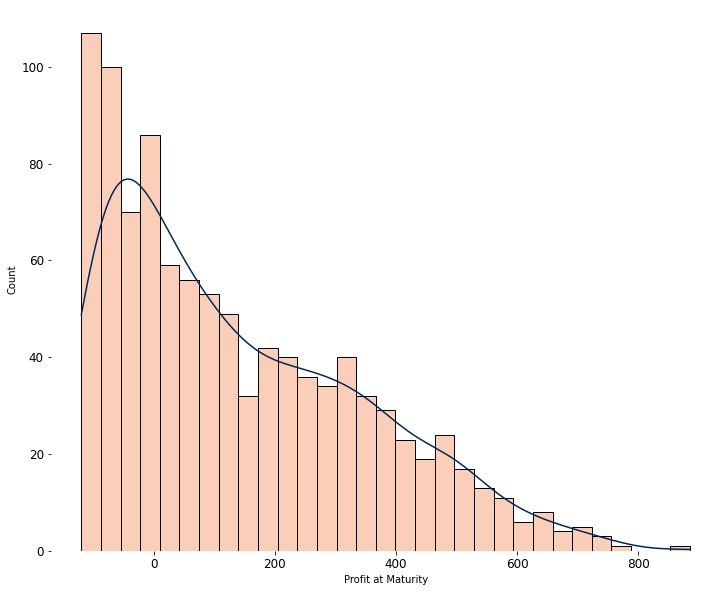

In [9]:
from Montecarlo import BSOptionsMC
mc = BSOptionsMC("IDBTVER", n_sims=1000)
mc.clear()
(mc.add(side="long", kind="call", condition="vanilla)
 .add(side="long", kind="put")
 .add(side="long", kind="put")
 )
mc.display()

## Butterfly

0.06679


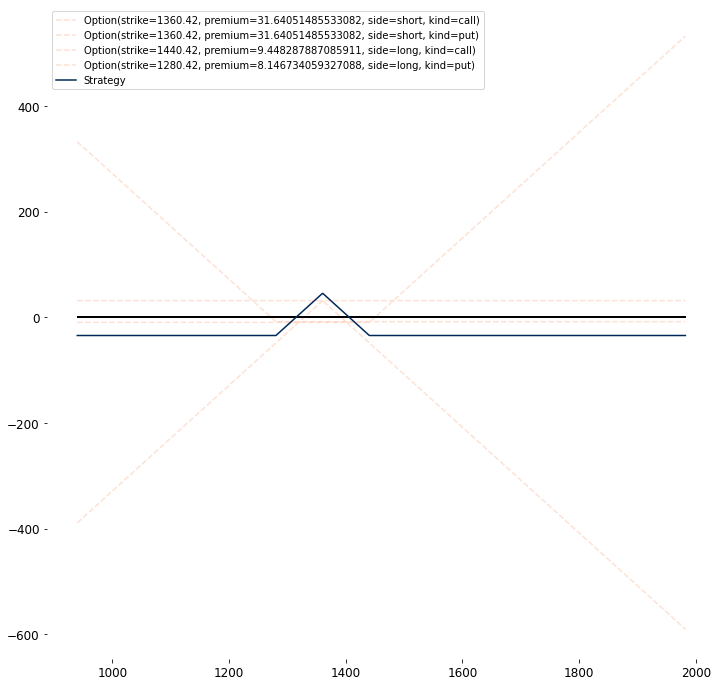

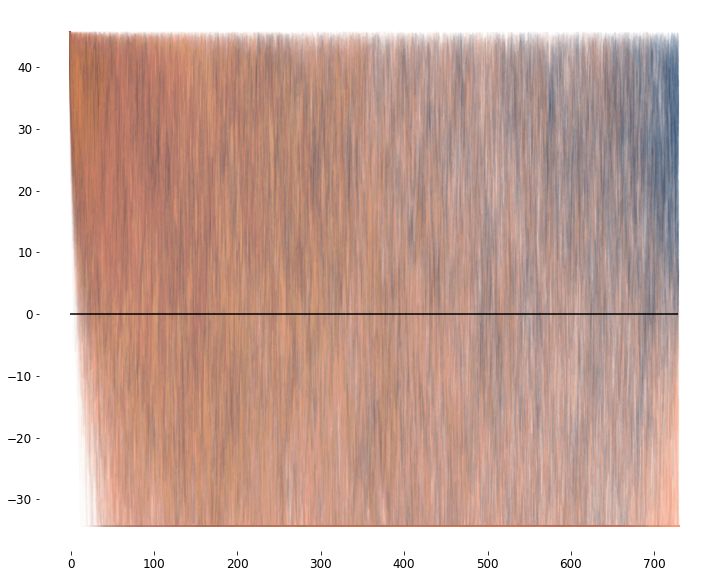

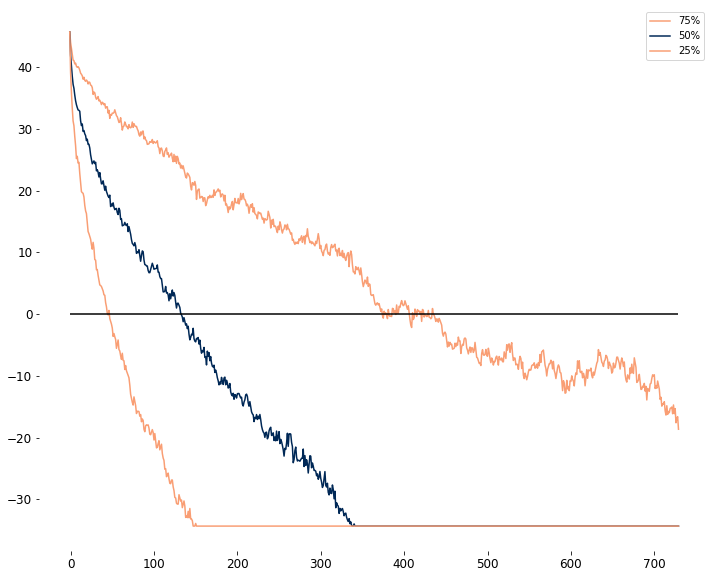

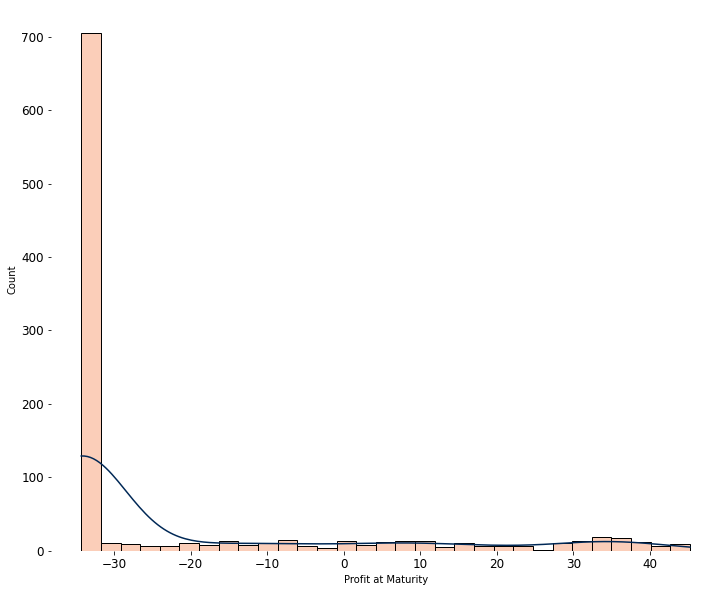

In [10]:
from Montecarlo import BSOptionsMC
mc = BSOptionsMC("IDBTVER", n_sims=1000)
mc.clear()
(mc.add(side="short", kind="call")
 .add(side="short", kind="put")
 .add(side="long", kind="call",strike=1440.42)
 .add(side="long", kind="put", strike=1280.42)
 )
mc.display()

## Double Certificate

0.06679


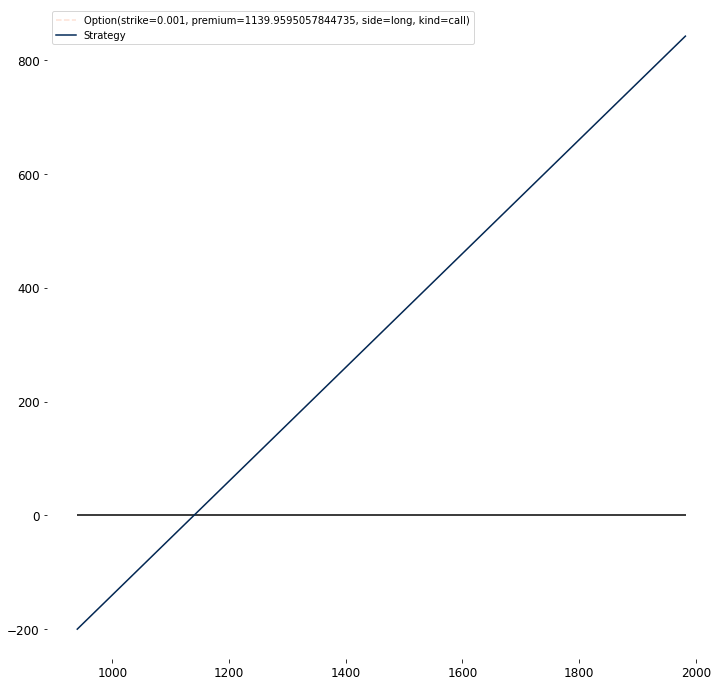

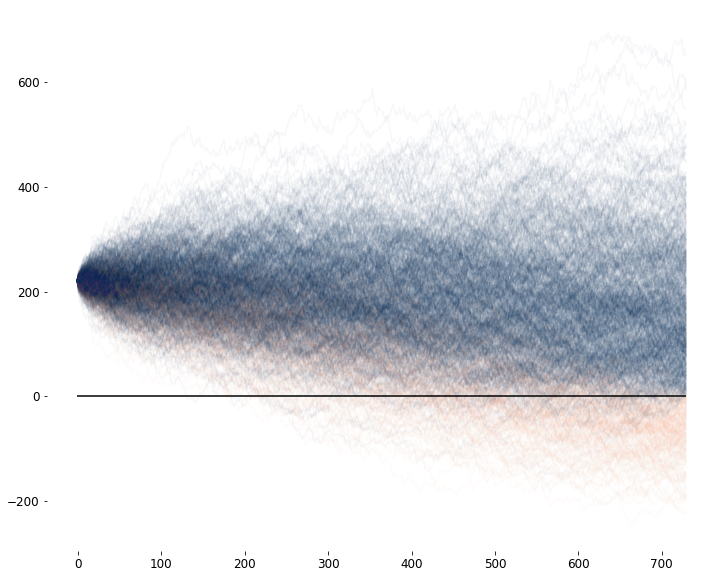

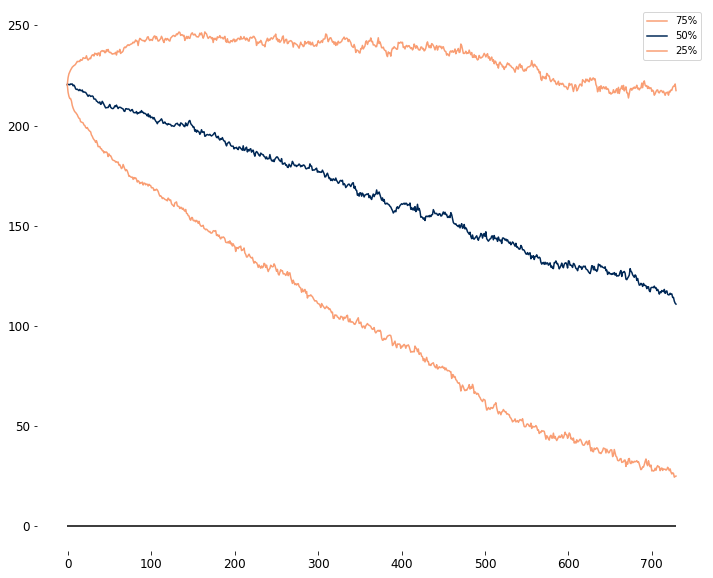

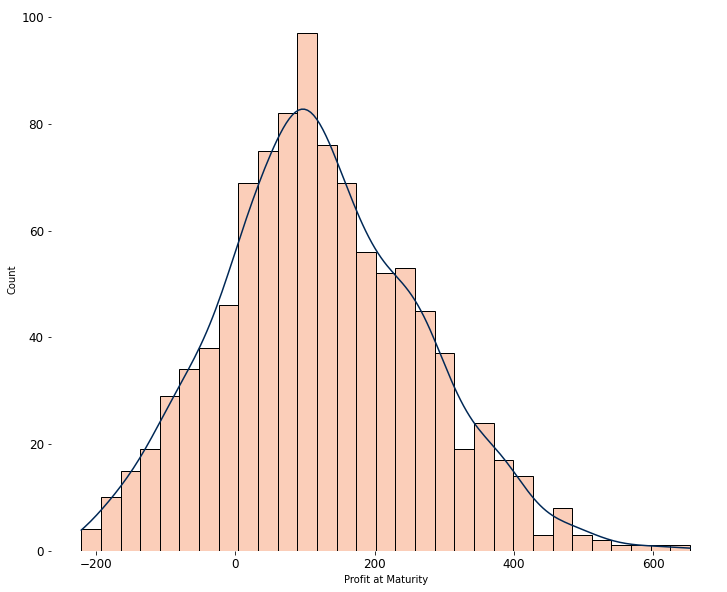

In [9]:
mc = BSOptionsMC("IDBTVER")
mc.clear()
(mc.add(side="long", kind="call", strike=0.001) 
 )
mc.display()

In [ ]:
mc = BSOptionsMC("IDBTVER")
mc.clear()
(mc.add(side="short", kind="put", condition="down and in", barrier=90/100)
 .add(side="short", kind="put", condition="down and in", barrier=90/100)
 )
mc.display()

# Call 2:1

0.06679


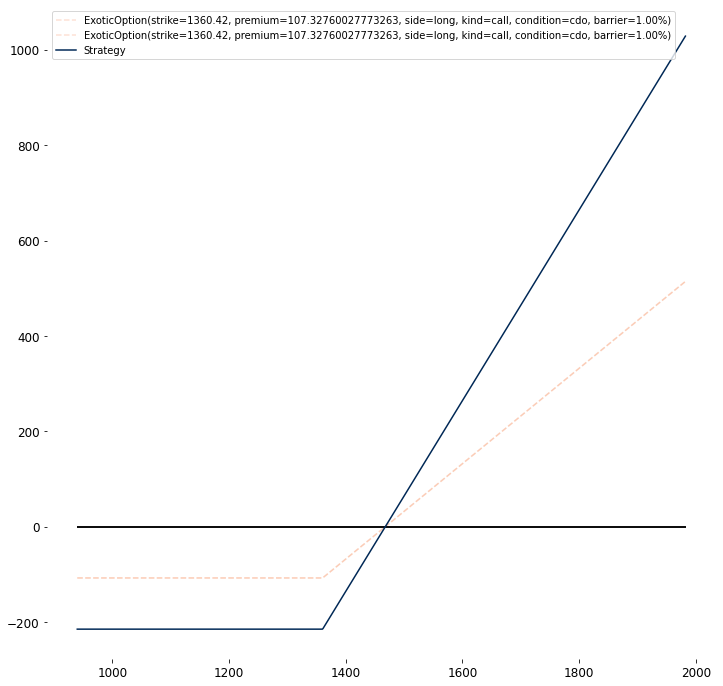

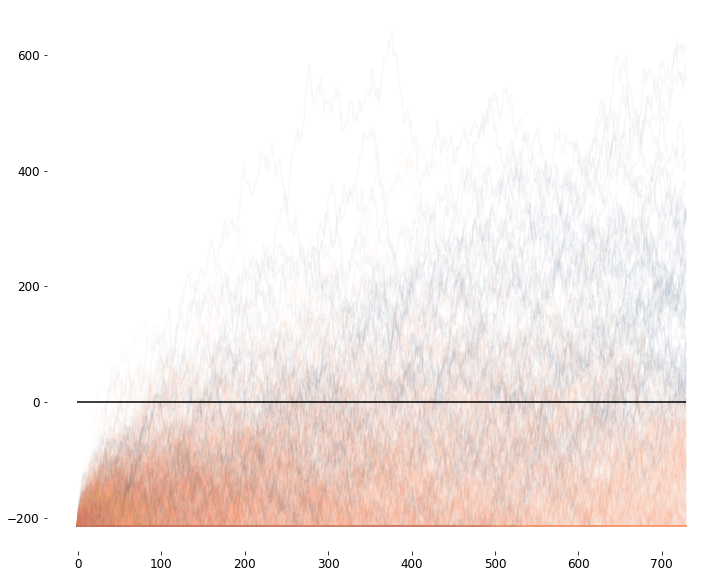

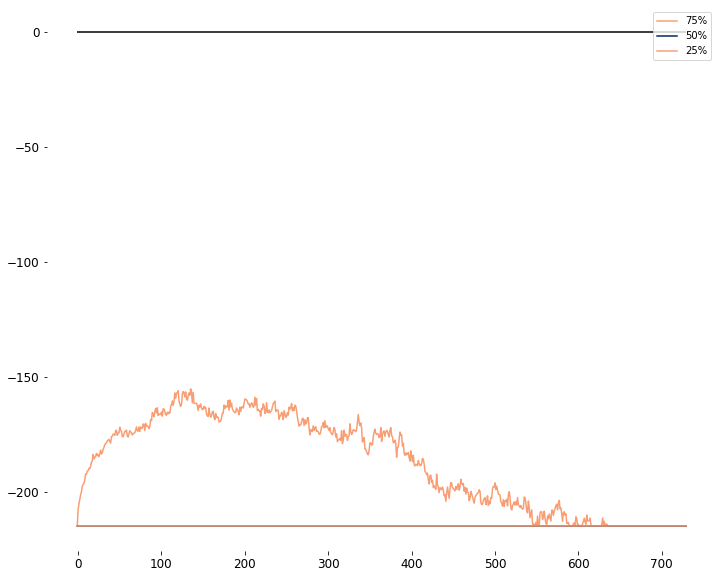

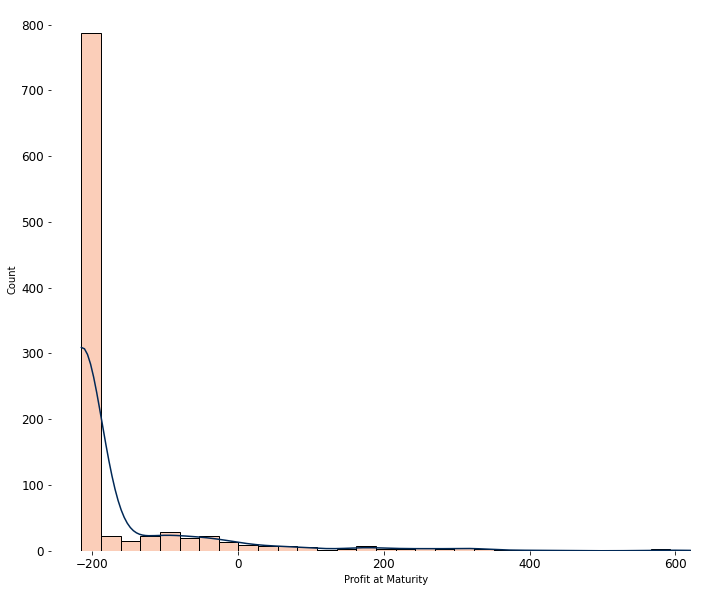

In [2]:
from Montecarlo import BSOptionsMC
mc = BSOptionsMC("IDBTVER")
mc.clear()
(mc.add(side="long", kind="call", condition="down and out", barrier=1/100)
.add(side="long", kind="call", condition="down out", barrier=1/100)
 )
mc.display()
# Build a simulation that uses calls